# Data Processing setup and library experimentation

In [1]:
from data_processing.data_wrangler import *

In [4]:
output_dict = DataLoad("G01V01P02_annotato.eaf","Data EAF\materials\G01\V01",['dstr','ORT','phr'])

In [31]:
output_dict

{'dstr':     ANNOTATION_ID                                     CVE_REF dstr  \
 0           a1368  cveid_d673a93d-9f59-44c4-b1a1-6c7e214c6d6f  PRL   
 1           a1369  cveid_28867b92-92a6-4bb8-9ad8-665c02a73a98   SP   
 2           a1370  cveid_d673a93d-9f59-44c4-b1a1-6c7e214c6d6f  PRL   
 3           a1418  cveid_d673a93d-9f59-44c4-b1a1-6c7e214c6d6f  PRL   
 4           a1419  cveid_9ba87e8c-e6e7-45b2-9728-4310820223ce   FP   
 ..            ...                                         ...  ...   
 246         a2544  cveid_1ada0200-ccfb-4bf1-a447-f998e1f5f56e  REP   
 247         a2545  cveid_28867b92-92a6-4bb8-9ad8-665c02a73a98   SP   
 248         a2546  cveid_d673a93d-9f59-44c4-b1a1-6c7e214c6d6f  PRL   
 249         a2547  cveid_28867b92-92a6-4bb8-9ad8-665c02a73a98   SP   
 250         a2548  cveid_1ada0200-ccfb-4bf1-a447-f998e1f5f56e  REP   
 
      Begin Time  End Time   Nr  
 0          1127      1558    1  
 1          2482      2650    2  
 2          6800      7137    3  
 3

In [19]:
phr_wrangle.head()

,ANNOTATION_ID,phr,Begin Time,End Time,Nr
0,a2576,phr1,150,15650,1
1,a2577,phr2,15650,30616,2
2,a2578,phr3,30616,70581,3
3,a2579,phr4,70581,86380,4
4,a2580,phr5,86380,102905,5


In [10]:
data_wrangled = data_wrangle(output_dict)

In [8]:
#data_wrangled = data_wrangled[data_wrangled.isna()]

In [26]:
data_wrangled['Begin Time'] = data_wrangled['Begin Time'].astype('int64')
data_wrangled['End Time'] = data_wrangled['End Time'].astype('int64')

,0,ANNOTATION_ID,Begin Time,End Time,Nr,ORT,Duration
0,NaN,a1,150,510,1,Allora,360.0
1,NaN,a2,510,700,2,ci,190.0
2,NaN,a3,700,1127,3,siamo,427.0
3,<oo>,NaN,1127,1550,3,<PRL>,423.0
4,NaN,a4,1550,2482,4,spostati,932.0


In [33]:
display(data_wrangled.head())

,0,ANNOTATION_ID,Begin Time,End Time,Nr,ORT,Duration
0,NaN,a1,150,510,1,Allora,360.0
1,NaN,a2,510,700,2,ci,190.0
2,NaN,a3,700,1127,3,siamo,427.0
3,<oo>,NaN,1127,1550,3,<PRL>,423.0
4,NaN,a4,1550,2482,4,spostati,932.0


In [28]:
data_all = pd.merge_asof(data_wrangled,phr_wrangle,on='Begin Time')

In [30]:
data_all[data_all.phr=='phr1']

,0,ANNOTATION_ID_x,Begin Time,End Time_x,Nr_x,ORT,Duration,ANNOTATION_ID_y,phr,End Time_y,Nr_y
0,NaN,a1,150,510,1,Allora,360.0,a2576,phr1,15650,1
1,NaN,a2,510,700,2,ci,190.0,a2576,phr1,15650,1
2,NaN,a3,700,1127,3,siamo,427.0,a2576,phr1,15650,1
3,<oo>,NaN,1127,1550,3,<PRL>,423.0,a2576,phr1,15650,1
4,NaN,a4,1550,2482,4,spostati,932.0,a2576,phr1,15650,1
5,NaN,a5,2482,2650,5,<sp>,168.0,a2576,phr1,15650,1
6,NaN,a6,2650,2930,6,dalla,280.0,a2576,phr1,15650,1
7,NaN,a7,2930,3070,7,<sp>,140.0,a2576,phr1,15650,1
8,NaN,a8,3070,3480,8,Chiesa,410.0,a2576,phr1,15650,1
9,NaN,a9,3480,3800,9,abbiamo,320.0,a2576,phr1,15650,1


In [35]:
data_all[data_all.phr=='phr26']

,0,ANNOTATION_ID_x,Begin Time,End Time_x,Nr_x,ORT,Duration,ANNOTATION_ID_y,phr,End Time_y,Nr_y
1263,NaN,a1261,481300,482086,1256,<breath>,786.0,a2601,phr26,521740,26
1264,NaN,a1262,482086,482300,1257,bene,214.0,a2601,phr26,521740,26
1265,NaN,a1263,482300,483040,1258,questa,740.0,a2601,phr26,521740,26
1266,NaN,a1264,483040,483140,1259,in,100.0,a2601,phr26,521740,26
1267,NaN,a1265,483140,483440,1260,questo,300.0,a2601,phr26,521740,26
...,...,...,...,...,...,...,...,...,...,...,...
1361,NaN,a1360,519693,519900,1354,<sp>,207.0,a2601,phr26,521740,26
1362,NaN,a1361,519900,520750,1355,alla,850.0,a2601,phr26,521740,26
1363,NaN,a1362,520750,520878,1356,<sp>,128.0,a2601,phr26,521740,26
1364,NaN,a1363,520878,521090,1357,alla,212.0,a2601,phr26,521740,26


In [34]:
display(data_wrangled.tail())

,0,ANNOTATION_ID,Begin Time,End Time,Nr,ORT,Duration
1361,NaN,a1360,519693,519900,1354,<sp>,207.0
1362,NaN,a1361,519900,520750,1355,alla,850.0
1363,NaN,a1362,520750,520878,1356,<sp>,128.0
1364,NaN,a1363,520878,521090,1357,alla,212.0
1365,NaN,a1364,521090,521740,1358,normalità,650.0


In [36]:
data_all.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1366 entries, 0 to 1365
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   0                8 non-null      object 
 1   ANNOTATION_ID_x  1358 non-null   object 
 2   Begin Time       1366 non-null   int64  
 3   End Time_x       1366 non-null   int64  
 4   Nr_x             1366 non-null   int32  
 5   ORT              1366 non-null   object 
 6   Duration         1366 non-null   float64
 7   ANNOTATION_ID_y  1366 non-null   object 
 8   phr              1366 non-null   object 
 9   End Time_y       1366 non-null   int64  
 10  Nr_y             1366 non-null   int64  
dtypes: float64(1), int32(1), int64(4), object(5)
memory usage: 122.7+ KB


In [ ]:
for el in range(5):
    print(el)

# Wav files!

In [1]:
from scipy.io import wavfile
import pandas as pd
import numpy as np

In [11]:
import os
def wav_reader(int_min = 15650,int_max = 30616,filename = 'G01V01P02.wav',out_name = 'prova.wav',filepath='Data EAF\\materials\\G01\\V01',out_path='Data EAF\\materials\\G01\\training_data\\wavs'):
    file_name = os.path.join('.',*filepath.split(os.path.sep),filename)
    audio_data = wavfile.read(file_name)
    phrase = audio_data[1]
    rate = audio_data[0]
    time = np.arange(1.,phrase.shape[0]/rate*1000+1,1/(rate/1000))
    out_file = os.path.join(*out_path.split(os.path.sep),out_name)
    if int_min-200 >=0:
        wavfile.write(out_file,rate,phrase[np.argmax(time[np.logical_and(time >= 0, time <= int_min-200)]):np.argmax(time[np.logical_and(time >= 0, time <= int_max+200)])])
    else:
        wavfile.write(out_file,rate,phrase[np.argmax(time[np.logical_and(time >= 0, time <= int_min+1)]):np.argmax(time[np.logical_and(time >= 0, time <= int_max+200)])])
        
#wavfile.write('prova.wav',rate,phrase[int((100+2)*44.12197646337256):int((15650+2)*44.12197646337256)])

In [12]:
df = pd.read_csv('.\\preprocessing_results\\trial.csv')

In [13]:
df.head()

,ANNOTATION_ID,Begin Time,End Time,Nr,ORT,Duration,wav_reference,ANNOTATION_ID_phr,phr,End Time_phr,Nr_phr
0,a1,150,510,1,Allora,360.0,G01V01P02.wav,a2576,phr1,6610,1
1,a2,510,700,2,ci,190.0,G01V01P02.wav,a2576,phr1,6610,1
2,a3,700,1127,3,siamo,427.0,G01V01P02.wav,a2576,phr1,6610,1
3,NaN,1127,1550,3,<PRL>,423.0,G01V01P02.wav,a2576,phr1,6610,1
4,a4,1550,2482,4,spostati,932.0,G01V01P02.wav,a2576,phr1,6610,1


In [14]:
df.loc[df.phr=='phr1','wav_reference'].str.replace('.wav','').iloc[0]+'phr1'+'.wav'

'G01V01P02phr1.wav'

In [15]:
'wavs/'+' '.join(df.loc[df.phr=='phr1','ORT'].to_list())

'wavs/Allora ci siamo <PRL> spostati <sp> dalla <sp> Chiesa abbiamo attraversato il chiostro dei procuratori <inspiration>'

In [16]:
#%debug
written_annot = []
for phr in df.phr.unique():
    phrase_start = df.loc[df.phr==phr,'Begin Time'].min()
    phrase_end = df.loc[df.phr==phr,'End Time'].max()
    input_file = df.loc[df.phr==phr,'wav_reference'].iloc[0]
    out_file_name = df.loc[df.phr==phr,'wav_reference'].str.replace('.wav','').iloc[0]+phr+'.wav'
    wav_reader(phrase_start,phrase_end,input_file,out_file_name)
    written_annot.append('wavs/'+df.loc[df.phr==phr,'wav_reference'].str.replace('.wav','').iloc[0]+phr+'.wav'+'|'+' '.join(df.loc[df.phr==phr,'ORT'].to_list()))

c:\users\hellf\.conda\envs\tacotron2\lib\site-packages\scipy\io\wavfile.py:273: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


In [17]:
with open('Data EAF\\materials\\G01\\training_data\\training_data.txt','w+') as file:
    file.write('\n'.join(written_annot)+'.')

In [17]:
written_annot

['wavs/G01V01P02phr1.wav|Allora ci siamo <PRL> spostati <sp> dalla <sp> Chiesa abbiamo attraversato il chiostro dei procuratori <inspiration>',
 'wavs/G01V01P02phr1b.wav|che erano <ehm>  insomma delle figure abbastanza importanti per <sp> <ehm>',
 'wavs/G01V01P02phr1c.wav|e funzionali alla vita alla v+/ alla vita della Certosa',
 'wavs/G01V01P02phr2.wav|<inspiration> cioè ovvero erano coloro che si occupavano <inspiration> delle <eeh> come dire dell amministrazione della vita quotidiana',
 'wavs/G01V01P02phr2b.wav|<sp> di tutto ciò che concerne la vita <inspiration> <eeh> quotidiana e i rapporti con l esterno <sp> dei certosini',
 'wavs/G01V01P02phr3.wav|<inspiration> che ovviamente <sp> vi dicevo <sp> sono degli eremiti Sono degli eremiti che vivono <inspiration> in comunità',
 'wavs/G01V01P02phr3b.wav|<sp> quindi  <PRL> una regola ibrida per certi per certi versi quindi <sp> <eeh> di <eeh> monaci che scelgono una forma <inspiration>',
 'wavs/G01V01P02phr3c.wav|<ehm> di allontanamento

In [13]:
df[df.phr==phr].head()

,ANNOTATION_ID,Begin Time,End Time,Nr,ORT,Duration,wav_reference,ANNOTATION_ID_phr,phr,End Time_phr,Nr_phr
3018,a1,0,130,1,Vi,130.0,G01V01P05.wav,a6741,phr65,9839,1
3019,a2,130,421,2,ho,291.0,G01V01P05.wav,a6741,phr65,9839,1
3020,a3,421,956,3,anticipato,535.0,G01V01P05.wav,a6741,phr65,9839,1
3021,a4,956,1840,4,all'inizio,884.0,G01V01P05.wav,a6741,phr65,9839,1
3022,a5,1840,1993,5,<sp>,153.0,G01V01P05.wav,a6741,phr65,9839,1


In [14]:
print(phrase_start,phrase_end)

0 9839


In [ ]:
with open('.\\Data EAF\\materials\\G01\\training_data\\training_file.txt','w+'):

# Old elements

In [34]:
#15650*44.12197646337256

690508.9316517806

In [21]:
#import numpy as np
##time = np.linspace(0.,phrase.shape[0]/rate,phrase.shape[0])
#time = np.arange(1.,phrase.shape[0]/rate*1000+1,1/(rate/1000))
##time *= 1000

In [19]:
#time = time.astype('int64') #provo rendendolo integer, ma è troppo basso, vado al livello millisecond direttamente

In [41]:
#print(rate,phrase.shape,phrase.shape[0]/522000)

44100 (23020200,) 44.1


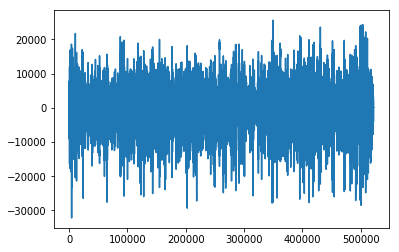

In [13]:
#import matplotlib.pyplot as plt
#plt.plot(time, phrase)

In [43]:
#np.argmax(time[np.logical_and(time>=0,time<=15650+10)])

690561

In [91]:
#time.shape

(23020200,)

In [52]:
#phrase.shape[0]/rate,phrase.shape[0]*1000+1

(522.0, 23020200001)

In [52]:
#img = np.random.randint(0,100,size=(3,48,48))